### Le Pendu

1. Choix d'un mot :


- Créer une liste de mots.
- Utiliser la fonction random.choice pour sélectionner un mot aléatoire.
- Créer une variable pour stocker le mot masqué (initialement, une chaîne de caractères composée de tirets “_” de la même longueur que le mot)

In [16]:
import random 

liste_de_mots = ["simplon", "web", "dev", "sidora", "python", "rss", "markdown"]

mot_recherché = random.choice(liste_de_mots)

mot_masqué = ["_"]*len(mot_recherché)

#print(mot_recherché)
#print(mot_masqué)


2. Boucle de jeu :


* Tant que le joueur n'a pas trouvé le mot et qu'il lui reste des tentatives :
- * Afficher le mot masqué et le nombre de tentatives restantes.
- - * avec des étoiles ou des underscores. “le pen**” ou “le pen__”
- * Demander au joueur de deviner une lettre.
- * Vérifier si la lettre est dans le mot :
- - * Si oui, mettre à jour le mot masqué en remplaçant les tirets correspondants.
- - * Si non, décrémenter le nombre de tentatives et afficher une partie du pendu.


Jeu du pendu !
Le mot à deviner contient 7 lettres.
mot recherché : ['_', '_', '_', '_', '_', '_', '_']
Nombre de tentatives restantes : 6


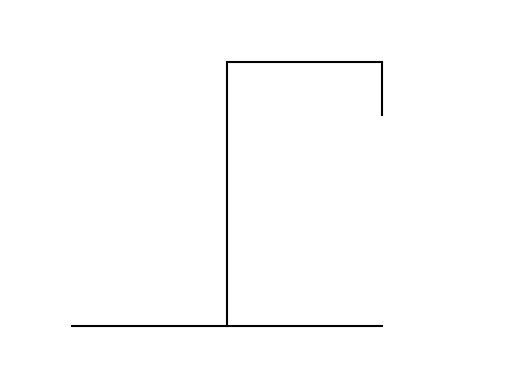

Mauvaise lettre, il vous reste  5 vies.
mot recherché : ['_', '_', '_', '_', '_', '_', '_']
Nombre de tentatives restantes : 5


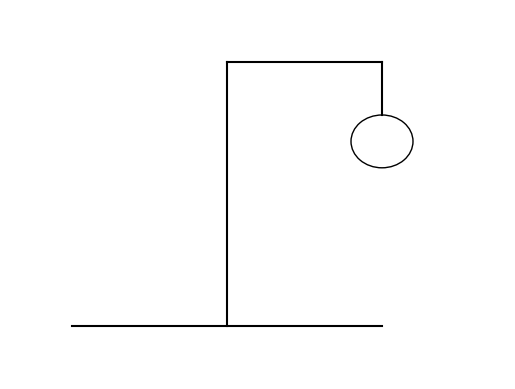

Bravo, vous avez trouvé une lettre du mot recherché !
mot recherché : ['s', '_', '_', '_', '_', '_', '_']
Nombre de tentatives restantes : 5


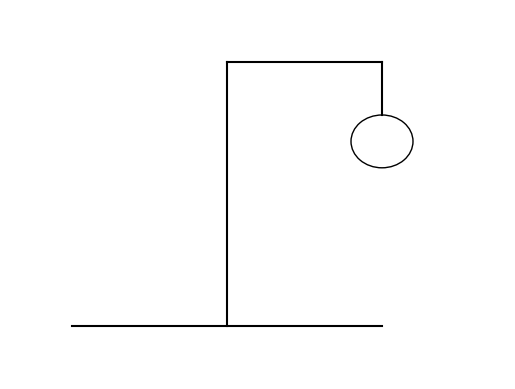

Bravo, vous avez trouvé une lettre du mot recherché !
mot recherché : ['s', 'i', '_', '_', '_', '_', '_']
Nombre de tentatives restantes : 5


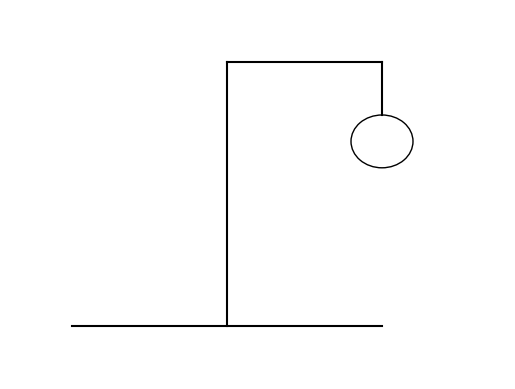

Mauvaise lettre, il vous reste  4 vies.
mot recherché : ['s', 'i', '_', '_', '_', '_', '_']
Nombre de tentatives restantes : 4


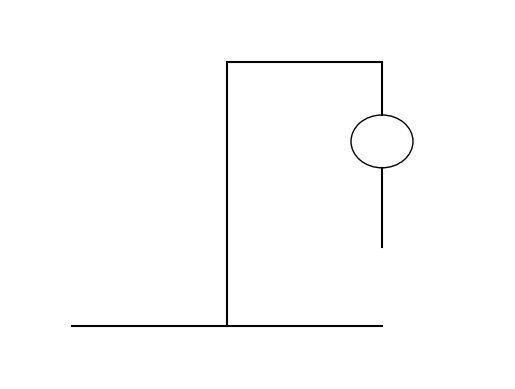

Bravo, vous avez trouvé une lettre du mot recherché !
mot recherché : ['s', 'i', '_', '_', '_', 'o', '_']
Nombre de tentatives restantes : 4


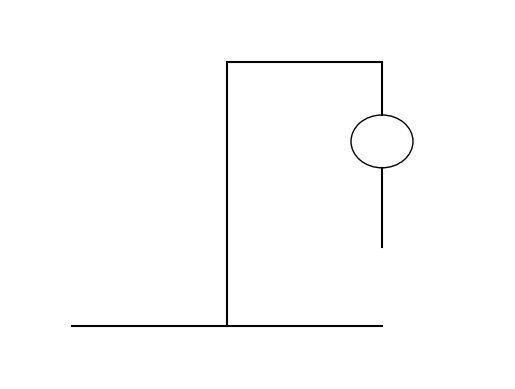

Mauvaise lettre, il vous reste  3 vies.
mot recherché : ['s', 'i', '_', '_', '_', 'o', '_']
Nombre de tentatives restantes : 3


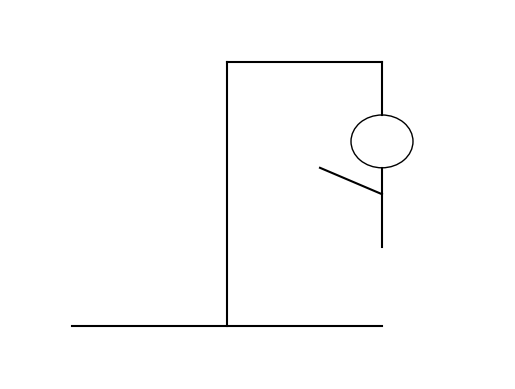

Mauvaise lettre, il vous reste  2 vies.
mot recherché : ['s', 'i', '_', '_', '_', 'o', '_']
Nombre de tentatives restantes : 2


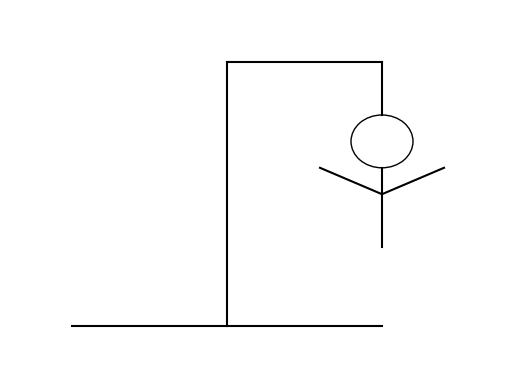

Vous avez deja proposé cette lettre.
mot recherché : ['s', 'i', '_', '_', '_', 'o', '_']
Nombre de tentatives restantes : 2


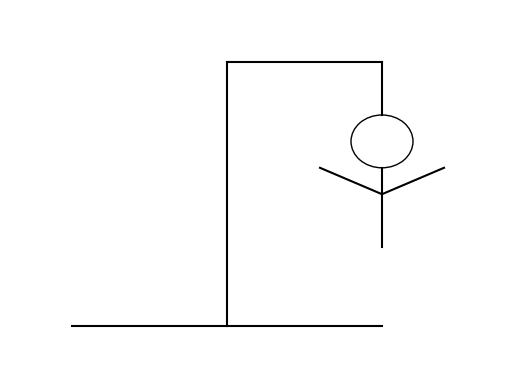

Bravo, vous avez trouvé une lettre du mot recherché !
mot recherché : ['s', 'i', 'm', '_', '_', 'o', '_']
Nombre de tentatives restantes : 2


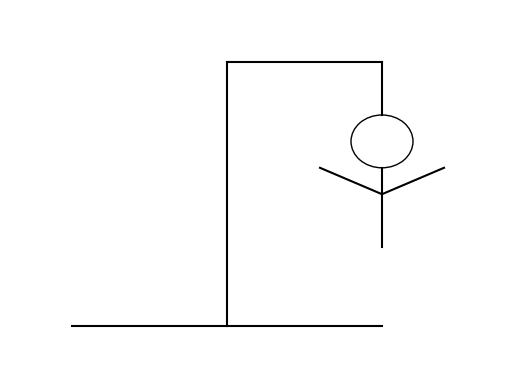

Bravo, vous avez trouvé une lettre du mot recherché !
mot recherché : ['s', 'i', 'm', 'p', '_', 'o', '_']
Nombre de tentatives restantes : 2


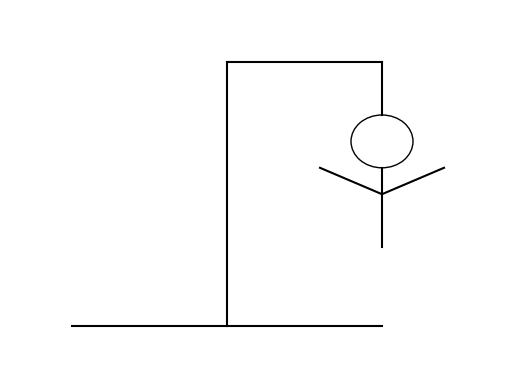

Bravo, vous avez trouvé une lettre du mot recherché !
mot recherché : ['s', 'i', 'm', 'p', 'l', 'o', '_']
Nombre de tentatives restantes : 2


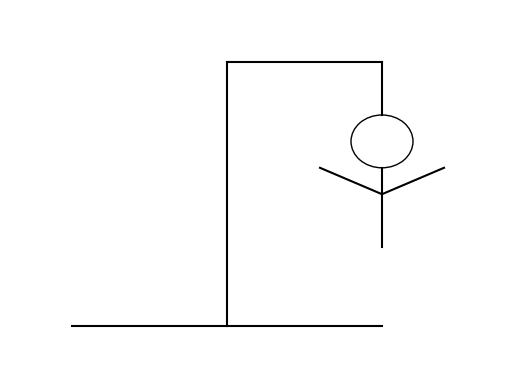

Bravo, vous avez trouvé une lettre du mot recherché !


In [17]:
nbr_vies = 6
nbr_erreur = 0
lettres_deja_proposées = []

print("Jeu du pendu !")
print("Le mot à deviner contient", len(mot_recherché),"lettres.")

while nbr_vies > 0 and "_" in mot_masqué:
    # Affichage du mot recherché
    print("mot recherché :", mot_masqué)
    print("Nombre de tentatives restantes :", nbr_vies)
    afficher_pendu(nbr_erreur)

    # On fait saisir une lettre que l'on transforme en minuscule pour comparer plus facilement avec le mot recherché
    lettre_saisie = input("Propose une lettre").lower()

    # On controle la saisie pour qu'il 
    if len(lettre_saisie) != 1 or not lettre_saisie.isalpha():
        print("Entrez une seule lettre svp.")
        continue

    # On controle si la lettre a deja ete saisie
    if lettre_saisie in lettres_deja_proposées:
        print("Vous avez deja proposé cette lettre.")
        continue

    # Ajout de la lettre trouvée dans les lettres deja proposées
    lettres_deja_proposées.append(lettre_saisie)

    # On regarde si la lettre est dans le mot recherche
    if lettre_saisie in mot_recherché:
        print("Bravo, vous avez trouvé une lettre du mot recherché !")

        # On remplace la lettre trouvée dans le mot masqué
        for i, lettre in enumerate(mot_recherché):
            if lettre == lettre_saisie:
                mot_masqué[i] = lettre_saisie

    # Sinon on decrémente le nombre de vie 
    else:
        nbr_vies -= 1
        nbr_erreur += 1
        print("Mauvaise lettre, il vous reste ", nbr_vies, "vies.")
    


3. Fin de partie :


* Si le joueur a trouvé le mot, afficher un message de victoire.
* Sinon, afficher un message de défaite et révéler le mot.


In [20]:
if "_" not in mot_masqué:
    print("Bravo vous avez trouvé le mot recherché :", mot_recherché)
else:
    print("Perdu vous n'avez pas trouvé le mot recherché :", mot_recherché)



Bravo vous avez trouvé le mot recherché : simplon


### Affichage du pendu avec fonction afficher_pendu

In [19]:
import matplotlib.pyplot as plt

def afficher_pendu(nb_erreurs):
    """
    Affiche le pendu en fonction du nombre d'erreurs.
    """
    plt.figure()  # Crée une nouvelle figure

    # Dessine la potence
    plt.plot([0, 1], [0, 0], 'k')  # Base
    plt.plot([0.5, 0.5], [0, 1], 'k')  # Poteau vertical
    plt.plot([0.5, 1], [1, 1], 'k')  # Barre horizontale
    plt.plot([1, 1], [1, 0.8], 'k')  # Corde

    # Dessine le corps du pendu en fonction du nombre d'erreurs
    if nb_erreurs > 0:# Tête
        tete = plt.Circle((1,0.7), 0.1, fill=False)
        plt.gca().add_patch(tete)
    if nb_erreurs > 1:# Corps
        plt.plot([1,1],[0.6,0.3], 'k')
    if nb_erreurs > 2:# Bras gauche
        plt.plot([0.8,1],[0.6,0.5],'k')
    if nb_erreurs > 3:# Bras droit
        plt.plot([1.2,1],[0.6,0.5],'k')
    if nb_erreurs > 4:# Jambe gauche
        plt.plot([1,0.8],[0.3,0.1],'k')
    if nb_erreurs > 5:# Jambe droite
        plt.plot([1,1.2],[0.3,0.1],'k')
    

    # Paramètres d'affichage
    plt.axis('off')  # Cache les axes
    plt.xlim(-0.2, 1.4)  # Ajuste les limites de l'axe x
    plt.ylim(-0.2, 1.2)  # Ajuste les limites de l'axe y
    plt.show()  # Affiche le pendu

#afficher_pendu(6)